In [1]:
#Import Imp Libaries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

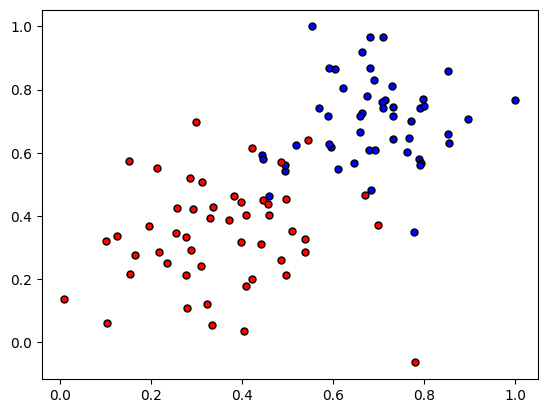

In [7]:
#Input Data
data = pd.read_csv('classification_data.csv')
X = np.array(data[['x','y']])
y = np.array(data['label'])
#Visualze the data
plot_points(X,y)
plt.show()

## Important Formulas

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [14]:
# Activation (sigmoid) function
def sigmoid(x):
    """
    Performs Sigmoid Activation Function on the input value and returns output in same format
    Input:
        x  - 2D numpy matrix
    Output:
        out - sigmoid(x)
    """
    #TASK 1
    #Code the sigmoid function
    return 1/(1+np.exp(-1*x))

    pass

# Output (prediction) formula
def output_formula(features, weights, bias):
    """ 
    Predicts the output of the model using weights and features
    Input:
        features - 2D Numpy Matrix shape(2,n_features)
        weights  - Numpy Array shape(2,)
        bias - Int value
    Output:
        Y - Prediction 
        """
    return sigmoid(np.dot(weights,features.T)+bias)
    pass

# Error (log-loss) formula
def error_formula(y, output):
    """
    Returns the Error 
    Input:
        Y - Labels
        output - Labels predicted by the model
    Output:
        Error - Error value computed using log-loss formula 
    """
    #Task 2
    #Code the log-loss function
    output = np.clip(output, 1e-15, 1 - 1e-15)
    error = -1*(y * np.log(output) + (1 - y) * np.log(1 - output))
    return error
    pass

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    """
    Calculates the gradient of slope and bias separately and returns the updated value of weight and bias
    Input:
        x - features(2D Numpy Matrix)
        y - labels(1D Numpy array)
        weights , bias - Existing weights and biases
        learnrate - Learning Rate(Scalar Float)  
    Output:
        weights,bias - Updated values of weights and biases"""
    #Task 3
    #Calculate the gradient for slope(weights) and bias
    
    output = output_formula(x, weights, bias)
    
    error = y - output
    
    gradient_weights = -1* np.dot(error, x)
    gradient_bias = -1 * np.sum(error)
    

    weights -= learnrate * gradient_weights
    bias -= learnrate * gradient_bias
    
    return weights, bias
    


 

In [15]:
#Main model Function

np.random.seed(44)

epochs = 150
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    #Initialize weights and bias
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0

    #Training the model
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            #Task 4 
            #Complete the code by asigning correct functions
            # output = None           #Get prediction of the model
            # error =  None           #Calculate Error
            # weights, bias = None    #Calculate Gradient and get new weights
            output = output_formula(x, weights, bias)
            error = error_formula(y, output.T)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions.T == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 15 ==========
Train loss:  0.5867385377172554
Accuracy:  0.67

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 45 ==========
Train loss:  0.44141234011674435
Accuracy:  0.88

========== Epoch 60 ==========
Train loss:  0.39734615716713984
Accuracy:  0.93

========== Epoch 75 ==========
Train loss:  0.3639708970403982
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94

========== Epoch 105 ==========
Train loss:  0.3170829534879146
Accuracy:  0.94

========== Epoch 120 ==========
Train loss:  0.30003918876922026
Accuracy:  0.94

========== Epoch 135 ==========
Train loss:  0.2858492044402544
Accuracy:  0.94


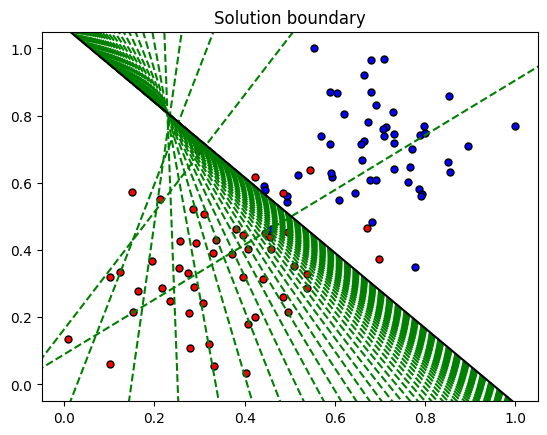

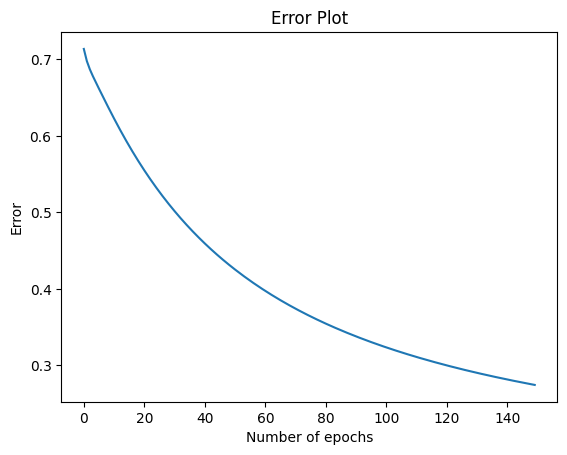

In [16]:
#Run this cell to see your output
train(X, y, epochs, learnrate, True)